In [2]:
import os
os.chdir("D:\\אוניברסיטה\\מעבדה\\Project - Maya\\Anomaly_Detection_In_Microbiome_Proj")
import sys
import pandas as pd
import numpy as np
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import MicrobiomeIsolationForest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import copy
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import ranksums
from scipy.stats import mannwhitneyu
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.ensemble import IsolationForest
import datetime
import matplotlib.ticker as ticker

from joblib import Parallel, delayed
from multiprocessing import cpu_count

from sklearn.mixture import GaussianMixture
from scipy.stats import mannwhitneyu
from sklearn.metrics import roc_auc_score

import warnings
from statannotations.Annotator import Annotator

warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
all_anomaly_counts = [1,2,3,5]
cur_data = None
for cur_anom_count in all_anomaly_counts:
    print(cur_anom_count)
    cur_data_subset_fran = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\franzosa\full_results\full_franzosa_results_50_%i.csv" % cur_anom_count, 
                                       index_col = 0)
    cur_data_subset_fran["dataset"] = "Franzosa"
    cur_data_subset_fran["Anomaly_percentage"] = cur_anom_count * 2

    cur_data_subset_wang = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\wang\full_results\full_wang_results_50_%i.csv" % cur_anom_count, 
                                       index_col = 0)
    cur_data_subset_wang["dataset"] = "Wang"
    cur_data_subset_wang["Anomaly_percentage"] = cur_anom_count * 2

    cur_data_subset_m3 = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\moving pictures\full_results\full_mp_results_M3_normal_50_%i.csv" % cur_anom_count, 
                                       index_col = 0)
    cur_data_subset_m3["dataset"] = "Caporaso M3"
    cur_data_subset_m3["Anomaly_percentage"] = cur_anom_count * 2

    cur_data_subset_f4 = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\moving pictures\full_results\full_mp_results_F4_normal_50_%i.csv" % cur_anom_count, 
                                       index_col = 0)
    cur_data_subset_f4["dataset"] = "Caporaso F4"
    cur_data_subset_f4["Anomaly_percentage"] = cur_anom_count * 2

    cur_data_subset_hmp = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\hmp\full_results\full_hmp_results_50_%i.csv" % cur_anom_count, 
                                       index_col = 0)
    cur_data_subset_hmp["dataset"] = "HMP"
    cur_data_subset_hmp["Anomaly_percentage"] = cur_anom_count * 2

    cur_data = pd.concat([cur_data, cur_data_subset_fran, cur_data_subset_wang, cur_data_subset_m3, cur_data_subset_f4, cur_data_subset_hmp])
cur_data["subsample_size"] = cur_data["subsample_size"].astype(str) 


1


C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_fran = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\franzosa\full_results\full_franzosa_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_wang = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\wang\full_results\full_wang_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_m3 = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\moving pictures\full_results\full_mp_results_M3_normal_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\252655910

2


C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_fran = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\franzosa\full_results\full_franzosa_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_wang = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\wang\full_results\full_wang_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_m3 = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\moving pictures\full_results\full_mp_results_M3_normal_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\252655910

3


C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_fran = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\franzosa\full_results\full_franzosa_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_wang = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\wang\full_results\full_wang_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_m3 = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\moving pictures\full_results\full_mp_results_M3_normal_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\252655910

5


C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_fran = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\franzosa\full_results\full_franzosa_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_wang = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\wang\full_results\full_wang_results_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\2526559103.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cur_data_subset_m3 = pd.read_csv(r"D:\אוניברסיטה\מעבדה\Project - Maya\moving pictures\full_results\full_mp_results_M3_normal_50_%i.csv" % cur_anom_count,
C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\252655910

In [4]:
cur_data[["dataset", "weights", "replacement", "subsample_size", "pc_method", "Anomaly_percentage"]].drop_duplicates().shape

(3936, 6)

In [5]:
summarized_auc = None
fails_list = []
counter = 0
for cur_dataset in set(cur_data["dataset"]):
    for cur_weights in set(cur_data["weights"]):
        for cur_rep in set(cur_data["replacement"]):
            for cur_subsample_size in set(cur_data["subsample_size"]):
                for cur_pc_method in set(cur_data["pc_method"]):
                    for cur_percentage in set(cur_data["Anomaly_percentage"]):
                        cur_data_subset = cur_data[(cur_data["dataset"] == cur_dataset) & (cur_data["weights"] == cur_weights) \
                            & (cur_data["replacement"] == cur_rep) & (cur_data["subsample_size"] == cur_subsample_size) \
                            & (cur_data["pc_method"] == cur_pc_method) & (cur_data["Anomaly_percentage"] == cur_percentage)]
                        counter += 1
                        print(counter, cur_data_subset.shape[0],  cur_dataset, cur_weights, cur_rep, cur_subsample_size, cur_pc_method, cur_percentage)
                        if cur_data_subset.shape[0] == 0:
                            fails_list.append([cur_dataset, cur_weights, cur_rep, cur_subsample_size, cur_pc_method, cur_percentage])
                        else:
                            cur_auc = pd.DataFrame([[cur_dataset, cur_percentage, 
                                           cur_weights, cur_rep, 
                                           cur_subsample_size, cur_pc_method, 
                                           roc_auc_score(cur_data_subset["anomaly"], cur_data_subset["score"])]],
                                        columns = ["Dataset", "Percentage", "Weights", "Replacement", "Subsample_size", "PC_method", "AUC"] )
                            summarized_auc = pd.concat([summarized_auc, cur_auc])
                            cur_data = cur_data[~((cur_data["dataset"] == cur_dataset) & (cur_data["weights"] == cur_weights) \
                                & (cur_data["replacement"] == cur_rep) & (cur_data["subsample_size"] == cur_subsample_size) \
                                & (cur_data["pc_method"] == cur_pc_method) & (cur_data["Anomaly_percentage"] == cur_percentage))]
summarized_auc

1 0 Caporaso F4 proportion False 1000 proportion 2
2 0 Caporaso F4 proportion False 1000 proportion 10
3 0 Caporaso F4 proportion False 1000 proportion 4
4 0 Caporaso F4 proportion False 1000 proportion 6
5 0 Caporaso F4 proportion False 1000 first 2
6 0 Caporaso F4 proportion False 1000 first 10
7 0 Caporaso F4 proportion False 1000 first 4
8 0 Caporaso F4 proportion False 1000 first 6
9 0 Caporaso F4 proportion False 1000 equal 2
10 0 Caporaso F4 proportion False 1000 equal 10
11 0 Caporaso F4 proportion False 1000 equal 4
12 0 Caporaso F4 proportion False 1000 equal 6
13 2500 Caporaso F4 proportion False 20 proportion 2
14 2500 Caporaso F4 proportion False 20 proportion 10
15 2500 Caporaso F4 proportion False 20 proportion 4
16 2500 Caporaso F4 proportion False 20 proportion 6
17 2500 Caporaso F4 proportion False 20 first 2
18 2500 Caporaso F4 proportion False 20 first 10
19 2500 Caporaso F4 proportion False 20 first 4
20 2500 Caporaso F4 proportion False 20 first 6
21 2500 Caporaso

,Dataset,Percentage,Weights,Replacement,Subsample_size,PC_method,AUC
0,Caporaso F4,2,proportion,False,20,proportion,0.701841
0,Caporaso F4,10,proportion,False,20,proportion,0.644835
0,Caporaso F4,4,proportion,False,20,proportion,0.694825
0,Caporaso F4,6,proportion,False,20,proportion,0.654909
0,Caporaso F4,2,proportion,False,20,first,0.689253
...,...,...,...,...,...,...,...
0,Caporaso M3,6,equal,True,35,first,0.871862
0,Caporaso M3,2,equal,True,35,equal,0.919184
0,Caporaso M3,10,equal,True,35,equal,0.856885
0,Caporaso M3,4,equal,True,35,equal,0.896738


In [9]:
all_wo_dup_weights = summarized_auc[["Dataset", "Percentage", "Replacement", "Subsample_size", "PC_method"]].drop_duplicates()

all_wei_rel = []
all_wei_dif = []
for i in range(all_wo_dup_weights.shape[0]):
    
    cur_wei = all_wo_dup_weights.iloc[i]
    cur_wei_prop = summarized_auc[(summarized_auc["Dataset"] == cur_wei["Dataset"])\
        &(summarized_auc["Percentage"] == cur_wei["Percentage"])\
        &(summarized_auc["Replacement"] == cur_wei["Replacement"])\
        &(summarized_auc["Subsample_size"] == cur_wei["Subsample_size"])\
        &(summarized_auc["PC_method"] == cur_wei["PC_method"])\
        &(summarized_auc["Weights"] == "proportion")]["AUC"]
    
    cur_wei_equal = summarized_auc[(summarized_auc["Dataset"] == cur_wei["Dataset"])\
        &(summarized_auc["Percentage"] == cur_wei["Percentage"])\
        &(summarized_auc["Replacement"] == cur_wei["Replacement"])\
        &(summarized_auc["Subsample_size"] == cur_wei["Subsample_size"])\
        &(summarized_auc["PC_method"] == cur_wei["PC_method"])\
        &(summarized_auc["Weights"] == "equal")]["AUC"]
    
    all_wei_dif.append((cur_wei_prop - cur_wei_equal).iloc[0])
    all_wei_rel.append(np.log((cur_wei_prop / cur_wei_equal).iloc[0]))

all_wo_dup_weights["AUC_dif"] = all_wei_dif
all_wo_dup_weights["AUC_rel"] = all_wei_rel

,Dataset,Percentage,Replacement,Subsample_size,PC_method,AUC_dif,AUC_rel
0,Caporaso\nF4,2,False,20,proportion,-0.287767,-0.343602
0,Caporaso\nF4,10,False,20,proportion,-0.319721,-0.402673
0,Caporaso\nF4,4,False,20,proportion,-0.289713,-0.348512
0,Caporaso\nF4,6,False,20,proportion,-0.321533,-0.399419
0,Caporaso\nF4,2,False,20,first,-0.296980,-0.358284
...,...,...,...,...,...,...,...
0,Caporaso\nM3,6,True,35,first,-0.085194,-0.102825
0,Caporaso\nM3,2,True,35,equal,-0.086249,-0.098531
0,Caporaso\nM3,10,True,35,equal,-0.079473,-0.097333
0,Caporaso\nM3,4,True,35,equal,-0.082350,-0.096327


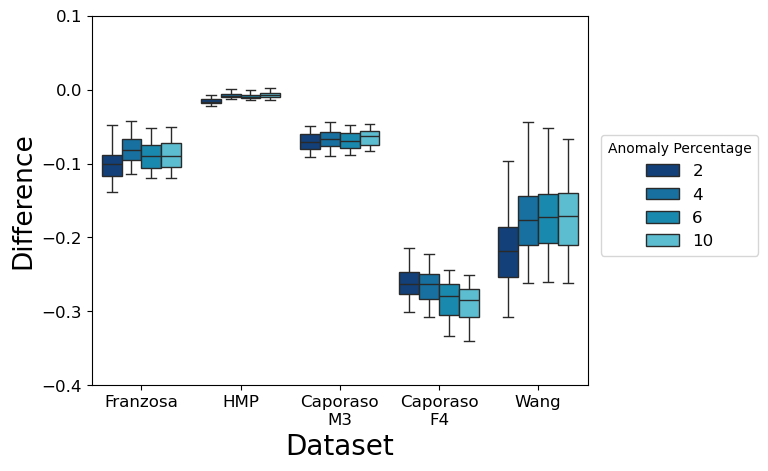

In [26]:
palette = {20: "#48CAE4", 10: "#48CAE4", 8: "#00B4D8", 6: "#0096C7", 4: "#0077B6", 2: "#023E8A"}

ax = sns.boxplot(data = all_wo_dup_weights.replace("Caporaso F4", "Caporaso\nF4").replace("Caporaso M3", "Caporaso\nM3"), 
                 x = "Dataset", hue = "Percentage", y = "AUC_dif", palette = palette, 
            order = ["Franzosa", "HMP", "Caporaso\nM3", "Caporaso\nF4", "Wang"], fliersize= 0)
plt.ylabel("Difference", fontsize=19)
plt.xlabel("Dataset", fontsize=20)
plt.legend(title = "Anomaly Percentage", bbox_to_anchor=(1.01, 0.7), fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(-0.4, 0.1)
plt.savefig(r"D:\אוניברסיטה\מעבדה\Project - Maya\figures\figS_features_weight_1000dpi.jpg", bbox_inches='tight', dpi=1000)
plt.show()

In [27]:
summarized_auc_wei_filter = summarized_auc[summarized_auc["Weights"] == "equal"]
all_wo_dup_rep = summarized_auc_wei_filter[["Dataset", "Percentage", "Subsample_size", "PC_method"]].drop_duplicates()


all_rep_dif = []
all_rep_rel = []

for i in range(all_wo_dup_rep.shape[0]):
    
    cur_rep = all_wo_dup_rep.iloc[i]
    cur_rep_true = summarized_auc_wei_filter[(summarized_auc_wei_filter["Dataset"] == cur_rep["Dataset"])\
        &(summarized_auc_wei_filter["Percentage"] == cur_rep["Percentage"])\
        &(summarized_auc_wei_filter["Subsample_size"] == cur_rep["Subsample_size"])\
        &(summarized_auc_wei_filter["PC_method"] == cur_rep["PC_method"])\
        &(summarized_auc_wei_filter["Replacement"] == True)]["AUC"]
    
    cur_rep_false = summarized_auc_wei_filter[(summarized_auc_wei_filter["Dataset"] == cur_rep["Dataset"])\
        &(summarized_auc_wei_filter["Percentage"] == cur_rep["Percentage"])\
        &(summarized_auc_wei_filter["Subsample_size"] == cur_rep["Subsample_size"])\
        &(summarized_auc_wei_filter["PC_method"] == cur_rep["PC_method"])\
        &(summarized_auc_wei_filter["Replacement"] == False)]["AUC"]
    
    all_rep_dif.append((cur_rep_true - cur_rep_false).iloc[0])
    all_rep_rel.append(np.log((cur_rep_true / cur_rep_false).iloc[0]))

all_wo_dup_rep["AUC_dif"] = all_rep_dif
all_wo_dup_rep["AUC_rel"] = all_rep_rel


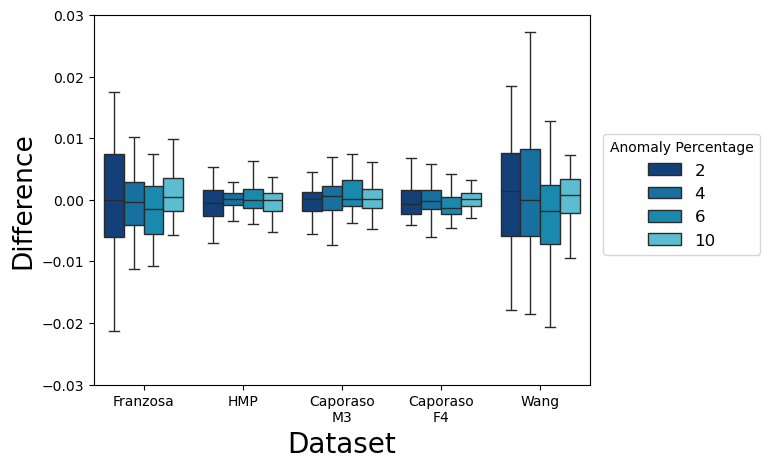

In [37]:
palette = {20: "#48CAE4", 10: "#48CAE4", 8: "#00B4D8", 6: "#0096C7", 4: "#0077B6", 2: "#023E8A"}

sns.boxplot(data = all_wo_dup_rep.replace("Caporaso F4", "Caporaso\nF4").replace("Caporaso M3", "Caporaso\nM3"), 
            x = "Dataset", hue = "Percentage", y = "AUC_dif", palette = palette, 
            order = ["Franzosa", "HMP", "Caporaso\nM3", "Caporaso\nF4", "Wang"], fliersize= 0)

plt.ylabel("Difference", fontsize=19)
plt.xlabel("Dataset", fontsize=20)
plt.legend(title = "Anomaly Percentage", bbox_to_anchor=(1.01, 0.7), fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.ylim(-0.03, 0.03)

plt.savefig(r"D:\אוניברסיטה\מעבדה\Project - Maya\figures\figS_features_rep_1000dpi.jpg", bbox_inches='tight', dpi=1000)

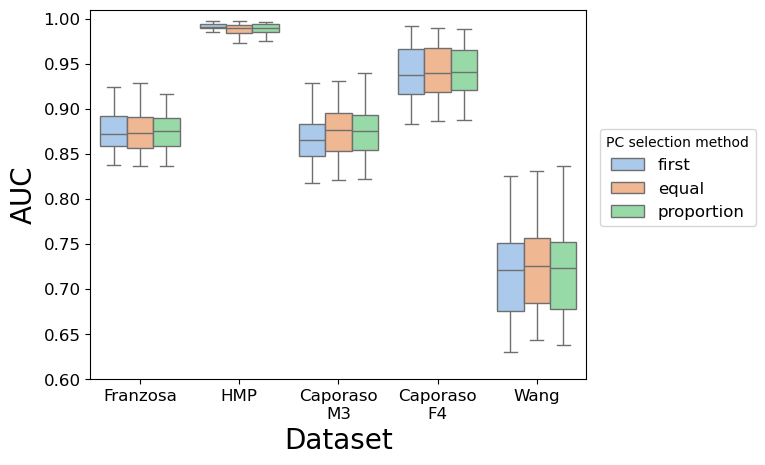

In [41]:
# summarized_auc_wei_filter = summarized_auc []
summarized_auc_rep_filter = summarized_auc_wei_filter[summarized_auc_wei_filter["Replacement"] == True]
pairs = []
for dataset in set(summarized_auc_rep_filter["Dataset"]):
    for pc_method1 in set(summarized_auc_rep_filter["PC_method"]):
        for pc_method2 in set(summarized_auc_rep_filter["PC_method"]):
            if pc_method1 != pc_method2:
                pairs.append(((dataset, pc_method1), (dataset, pc_method2)))

ax = sns.boxplot(data = summarized_auc_rep_filter.replace("Caporaso F4", "Caporaso\nF4").replace("Caporaso M3", "Caporaso\nM3"), 
                 x = "Dataset", hue = "PC_method", y = "AUC",
            hue_order=["first", "equal", "proportion"],
            order = ["Franzosa", "HMP", "Caporaso\nM3", "Caporaso\nF4", "Wang"], palette = "pastel", fliersize=0)

# annot.new_plot(ax, pairs, data=summarized_auc_wei_filter, x="Dataset", y="AUC", 
#                hue_order=["first", "equal", "proportion"],
#                order=["Franzosa", "Caporaso M3", "Caporaso F4", "Wang"])
# annot.configure(test='Mann-Whitney', verbose=2)
# annot.apply_test()
# annot.annotate()
plt.ylabel("AUC", fontsize=20)
plt.xlabel("Dataset", fontsize=20)
plt.legend(title = "PC selection method", bbox_to_anchor=(1.01, 0.7), fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.6, 1.01)
plt.savefig(r"D:\אוניברסיטה\מעבדה\Project - Maya\figures\figS_pc_selection_1000dpi.jpg", bbox_inches='tight', dpi=1000)


In [42]:
summarized_auc_pc_filter = summarized_auc_rep_filter[summarized_auc_rep_filter["PC_method"] == "proportion"]
summarized_auc_no_rand_subsample = summarized_auc_pc_filter[summarized_auc_pc_filter["Subsample_size"] != "random"]
summarized_auc_no_rand_subsample["Subsample_size"] = summarized_auc_no_rand_subsample["Subsample_size"].astype(int)

C:\Users\Omri\AppData\Local\Temp\ipykernel_17028\464704256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summarized_auc_no_rand_subsample["Subsample_size"] = summarized_auc_no_rand_subsample["Subsample_size"].astype(int)


In [43]:
summarized_auc_only_rand_subsample = summarized_auc_pc_filter[summarized_auc_pc_filter["Subsample_size"] == "random"]
summarized_auc_only_rand_subsample[["Dataset", "Percentage", "AUC"]].groupby(by = "Dataset").mean()

,Percentage,AUC
Dataset,,
Caporaso F4,5.5,0.927581
Caporaso M3,5.5,0.866198
Franzosa,5.5,0.859593
HMP,5.5,0.991983
Wang,5.5,0.708050


In [44]:
num_of_features = {'Caporaso F4': 335, 'Caporaso M3': 335, 'Franzosa': 11845, 'HMP': 13268, 'Wang': 11845}
data_size = pd.DataFrame.from_dict(num_of_features,
                      orient = "index", columns = ["size"])
summarized_auc_no_rand_subsample_size = pd.merge(left = summarized_auc_no_rand_subsample, right = data_size, left_on = "Dataset", right_index = True)
summarized_auc_no_rand_subsample_size["subsample_prop"] = summarized_auc_no_rand_subsample_size["Subsample_size"] / \
    summarized_auc_no_rand_subsample_size["size"]
summarized_auc_no_rand_subsample_size["subsample_prop"] = summarized_auc_no_rand_subsample_size["subsample_prop"] * 100

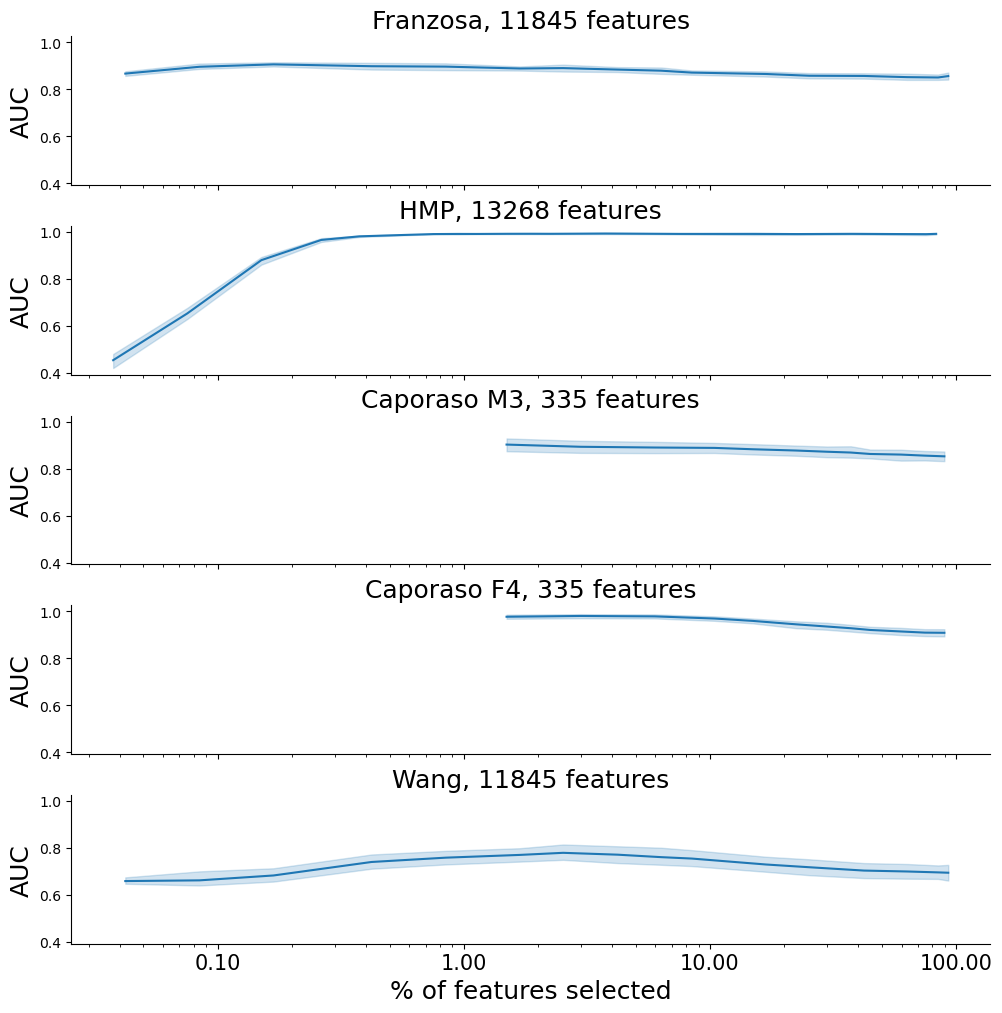

In [52]:
palette = {20: "#48CAE4", 10: "#48CAE4", 8: "#00B4D8", 6: "#0096C7", 4: "#0077B6", 2: "#023E8A"}

g = sns.FacetGrid(data = summarized_auc_no_rand_subsample_size, row="Dataset", 
                  height=2, aspect=5, row_order = ["Franzosa", "HMP", "Caporaso M3", "Caporaso F4", "Wang"])
g.map(sns.lineplot, "subsample_prop", "AUC")
# g.add_legend(title = "Anomaly Percentage")
g.set(xscale='log')

for dataset, ax in g.axes_dict.items():
    ax.set_title(f"{dataset}, {num_of_features.get(dataset, 'Unknown')} features", fontsize = 18)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f")) 
    ax.set_ylabel("AUC", fontsize=18)
plt.xlabel("% of features selected", fontsize=18)
ax.tick_params(axis='x', which='major', labelsize=15)
plt.savefig(r"D:\אוניברסיטה\מעבדה\Project - Maya\figures\figS_proportion_1000dpi.jpg", bbox_inches='tight', dpi=1000)